**Project Title**

AI-Powered Disaster Response Logistics: Optimized Emergency Supply Chain Routing

**Problem Statement**

Disasters such as floods, cyclones, earthquakes, and wildfires frequently disrupt road networks, making it challenging to deliver essential supplies, including food, water, and medicine, to affected communities. Traditional supply chain routing methods are slow and ineffective under uncertain and dynamic conditions, leading to delays, resource wastage, and unmet demand. An intelligent system that can adapt to changing road conditions and demand patterns is essential for improving disaster response efficiency and saving lives.

**Description**

This project develops an AI-driven optimization model for emergency supply chain routing during disasters. The system integrates road network data, hazard impact information, and demand signals from affected shelters to generate optimized delivery routes. It uses a combination of graph optimization techniques and reinforcement learning to dynamically re-route vehicles when roads are blocked or new requests arise.

The dataset may include:

Road network graphs (OpenStreetMap, government GIS data)

Disaster impact data (flood zones, landslide risks, road closures)

Demand data (shelter locations, population size, priority needs)

Logistics data (vehicle capacities, depot locations, delivery times)

The AI model predicts optimal routes that minimize delays, balance demand fulfillment across shelters, and reduce operational costs while avoiding hazardous zones. A visualization dashboard will display live routes, supply demand status, and risk zones to support decision-making for emergency response teams.

In [2]:
%pip install osmnx
import pandas as pd
import geopandas as gpd
import osmnx as ox
import folium
from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.5 MB/s eta 0:00:00


In [4]:
# Load Shelter Demand Data

shelters = pd.read_csv("/content/mumbai_shelters_large.csv")
print("🏠 Shelter Data Preview:\n", shelters.head(), "\n")
print("Shelter Data Info:")
print(shelters.info(), "\n")
print("Shelter Data Description:")
print(shelters.describe(), "\n")
print("Missing Values in Shelter Data:\n", shelters.isnull().sum(), "\n")

🏠 Shelter Data Preview:
    shelter_id   latitude  longitude  capacity district
0           1  18.987270  72.768089      1128   Mumbai
1           2  19.275357  72.935974      1589   Mumbai
2           3  19.165997  72.939222       703   Mumbai
3           4  19.099329  72.973100       781   Mumbai
4           5  18.878009  73.004132      1952   Mumbai 

Shelter Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   shelter_id  300 non-null    int64  
 1   latitude    300 non-null    float64
 2   longitude   300 non-null    float64
 3   capacity    300 non-null    int64  
 4   district    300 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 11.8+ KB
None 

Shelter Data Description:
       shelter_id    latitude   longitude     capacity
count  300.000000  300.000000  300.000000   300.000000
mean   150.500000   19.0476

In [5]:

# Load Vehicle / Depot Data

vehicles = pd.read_csv("/content/mumbai_vehicles_large.csv")
print("🚚 Vehicle Data Preview:\n", vehicles.head(), "\n")
print("Vehicle Data Info:")
print(vehicles.info(), "\n")
print("Vehicle Data Description:")
print(vehicles.describe(), "\n")
print("Missing Values in Vehicle Data:\n", vehicles.isnull().sum(), "\n")

🚚 Vehicle Data Preview:
   vehicle_id       type  capacity   agency     status district   latitude  \
0         V1       Jeep        66  Private  Available   Mumbai  19.221906   
1         V2  Ambulance        20     Govt     In Use   Mumbai  19.030165   
2         V3  Ambulance        10      NGO     In Use   Mumbai  18.908794   
3         V4  Ambulance        28     Govt  Available   Mumbai  18.866889   
4         V5      Truck        35  Private  Available   Mumbai  19.276654   

   longitude  
0  72.935337  
1  72.844102  
2  72.757363  
3  73.002994  
4  72.761370   

Vehicle Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   vehicle_id  1000 non-null   object 
 1   type        1000 non-null   object 
 2   capacity    1000 non-null   int64  
 3   agency      1000 non-null   object 
 4   status      1000 non-null   object 
 5   dist

In [6]:

# Load Disaster Impact Data (Hazard Zones)

hazard_zones = pd.read_csv("/content/mumbai_hazard_zones_large.csv")
print("🌊 Hazard Zones Data Preview:\n", hazard_zones.head(), "\n")
print("Hazard Zones Info:")
print(hazard_zones.info(), "\n")
print("Hazard Zones Description:")
print(hazard_zones.describe(), "\n")
print("Missing Values in Hazard Zones:\n", hazard_zones.isnull().sum(), "\n")

🌊 Hazard Zones Data Preview:
   zone_id   latitude  longitude risk_level hazard_type
0     HZ1  18.902272  72.932882        Low        Fire
1     HZ2  19.157032  73.006295       High       Flood
2     HZ3  19.046991  72.751171     Medium        Fire
3     HZ4  19.177318  72.913559     Medium     Cyclone
4     HZ5  18.851458  72.853951     Medium        Fire 

Hazard Zones Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zone_id      300 non-null    object 
 1   latitude     300 non-null    float64
 2   longitude    300 non-null    float64
 3   risk_level   300 non-null    object 
 4   hazard_type  300 non-null    object 
dtypes: float64(2), object(3)
memory usage: 11.8+ KB
None 

Hazard Zones Description:
         latitude   longitude
count  300.000000  300.000000
mean    19.054355   72.930491
std      0.139788    0.104787
min     18.8001

In [7]:
#  Load Road Network for Mumbai

place = "Mumbai, India"
G = ox.graph_from_place(place, network_type="drive")

# Convert to GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G)

# Save as CSV
nodes.to_csv("mumbai_roads_nodes.csv", index=False)
edges.to_csv("mumbai_roads_edges.csv", index=False)

print(f"✅ Road network loaded: {len(G.nodes)} nodes, {len(G.edges)} edges")
print("📂 Files saved: mumbai_roads_nodes.csv & mumbai_roads_edges.csv\n")

# Download files in Colab
#files.download("mumbai_roads_nodes.csv")
#files.download("mumbai_roads_edges.csv")


✅ Road network loaded: 18781 nodes, 43168 edges
📂 Files saved: mumbai_roads_nodes.csv & mumbai_roads_edges.csv



In [8]:
# Load roads_edges

roads_edges = pd.read_csv("/content/mumbai_roads_edges.csv")
print("roads_edges Data Preview:\n", roads_edges.head(), "\n")
print("roads_edges Info:")
print(roads_edges.info(), "\n")
print("roads_edges Description:")
print(roads_edges.describe(), "\n")
print("Missing Values in roads_edges:\n", roads_edges.isnull().sum(), "\n")

roads_edges Data Preview:
                                 osmid      highway lanes  \
0               [122277872, 84017620]     motorway     5   
1  [779575745, 779575746, 1188911679]  residential   NaN   
2                           322981396  residential   NaN   
3                          1191876389     tertiary   NaN   
4                          1191876389     tertiary   NaN   

                       name  oneway reversed       length maxspeed  \
0       Sion Panvel Highway    True    False  2053.419145      120   
1                       NaN   False     True   547.410950      NaN   
2  Vithoba Nathu Gawad Marg   False     True   216.099902      NaN   
3                  RCF Road   False    False   808.581445      NaN   
4                  RCF Road   False     True   294.447976      NaN   

                                            geometry tunnel junction bridge  \
0  LINESTRING (72.9591875 19.0588477, 72.958572 1...    NaN      NaN    NaN   
1  LINESTRING (72.9591875 19.0588

In [9]:
# Load roads_nodes

roads_nodes = pd.read_csv("/content/mumbai_roads_nodes.csv")
print("roads_nodes Data Preview:\n", roads_nodes.head(), "\n")
print("roads_nodes Info:")
print(roads_nodes.info(), "\n")
print("roads_nodes Description:")
print(roads_nodes.describe(), "\n")
print("Missing Values in roads_nodes:\n", roads_nodes.isnull().sum(), "\n")

roads_nodes Data Preview:
            y          x  street_count          highway junction  \
0  19.058848  72.959187             3              NaN      NaN   
1  19.033309  72.888614             3              NaN      NaN   
2  19.042996  72.925214             3              NaN      NaN   
3  19.045532  72.914053             4  traffic_signals      NaN   
4  19.045855  72.905108             3              NaN      NaN   

                        geometry  
0  POINT (72.9591875 19.0588477)  
1  POINT (72.8886138 19.0333093)  
2  POINT (72.9252136 19.0429959)  
3  POINT (72.9140531 19.0455324)  
4   POINT (72.9051082 19.045855)   

roads_nodes Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18781 entries, 0 to 18780
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   y             18781 non-null  float64
 1   x             18781 non-null  float64
 2   street_count  18781 non-null  int64  
 3   highway     

In [12]:
# Load roads_edges Data
print("roads_edges Data Preview:\n", roads_edges.head(), "\n")
print("roads_edges Info:")
print(roads_edges.info(), "\n")
print("roads_edges Description:")
print(roads_edges.describe(), "\n")
print("Missing Values in roads_edges:\n", roads_edges.isnull().sum(), "\n")

roads_edges Data Preview:
                                 osmid      highway lanes  \
0               [122277872, 84017620]     motorway     5   
1  [779575745, 779575746, 1188911679]  residential   NaN   
2                           322981396  residential   NaN   
3                          1191876389     tertiary   NaN   
4                          1191876389     tertiary   NaN   

                       name  oneway reversed       length maxspeed  \
0       Sion Panvel Highway    True    False  2053.419145      120   
1                       NaN   False     True   547.410950      NaN   
2  Vithoba Nathu Gawad Marg   False     True   216.099902      NaN   
3                  RCF Road   False    False   808.581445      NaN   
4                  RCF Road   False     True   294.447976      NaN   

                                            geometry tunnel junction bridge  \
0  LINESTRING (72.9591875 19.0588477, 72.958572 1...    NaN      NaN    NaN   
1  LINESTRING (72.9591875 19.0588

In [13]:
# Load roads_nodes Data
print("roads_nodes Data Preview:\n", roads_nodes.head(), "\n")
print("roads_nodes Info:")
print(roads_nodes.info(), "\n")
print("roads_nodes Description:")
print(roads_nodes.describe(), "\n")
print("Missing Values in roads_nodes:\n", roads_nodes.isnull().sum(), "\n")

roads_nodes Data Preview:
            y          x  street_count          highway junction  \
0  19.058848  72.959187             3              NaN      NaN   
1  19.033309  72.888614             3              NaN      NaN   
2  19.042996  72.925214             3              NaN      NaN   
3  19.045532  72.914053             4  traffic_signals      NaN   
4  19.045855  72.905108             3              NaN      NaN   

                        geometry  
0  POINT (72.9591875 19.0588477)  
1  POINT (72.8886138 19.0333093)  
2  POINT (72.9252136 19.0429959)  
3  POINT (72.9140531 19.0455324)  
4   POINT (72.9051082 19.045855)   

roads_nodes Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18781 entries, 0 to 18780
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   y             18781 non-null  float64
 1   x             18781 non-null  float64
 2   street_count  18781 non-null  int64  
 3   highway     

In [55]:
# Create a base map centered around Mumbai
m = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# Add markers for shelters
for idx, row in shelters.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Shelter ID: {row['shelter_id']}<br>Capacity: {row['capacity']}",
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(m)

# Add markers for available vehicles
for idx, row in vehicles[vehicles['status'] == 'Available'].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Vehicle ID: {row['vehicle_id']}<br>Type: {row['type']}<br>Capacity: {row['capacity']}",
        icon=folium.Icon(color='green', icon='car')
    ).add_to(m)

# Add markers for hazard zones with different colors based on risk level
color_map = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
for idx, row in hazard_zones.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Hazard Zone ID: {row['zone_id']}<br>Risk Level: {row['risk_level']}<br>Type: {row['hazard_type']}",
        icon=folium.Icon(color=color_map.get(row['risk_level'], 'gray'), icon='warning')
    ).add_to(m)

# Display the map
m

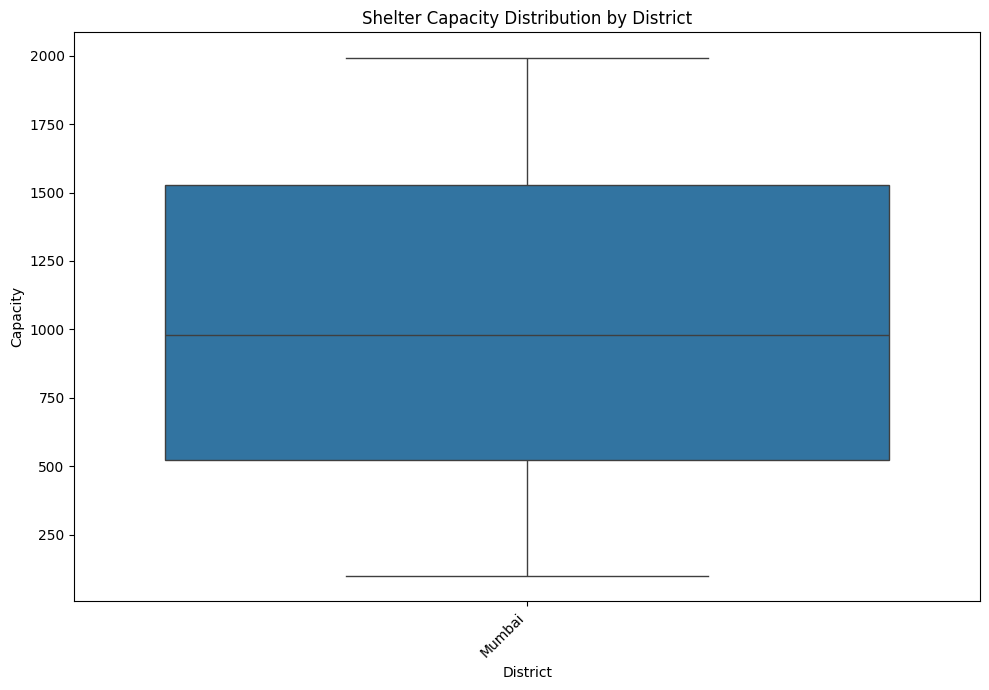

In [56]:
# Bivariate Analysis: Shelter Capacity vs. District

plt.figure(figsize=(10, 7))
sns.boxplot(data=shelters, x='district', y='capacity')
plt.title('Shelter Capacity Distribution by District')
plt.xlabel('District')
plt.ylabel('Capacity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

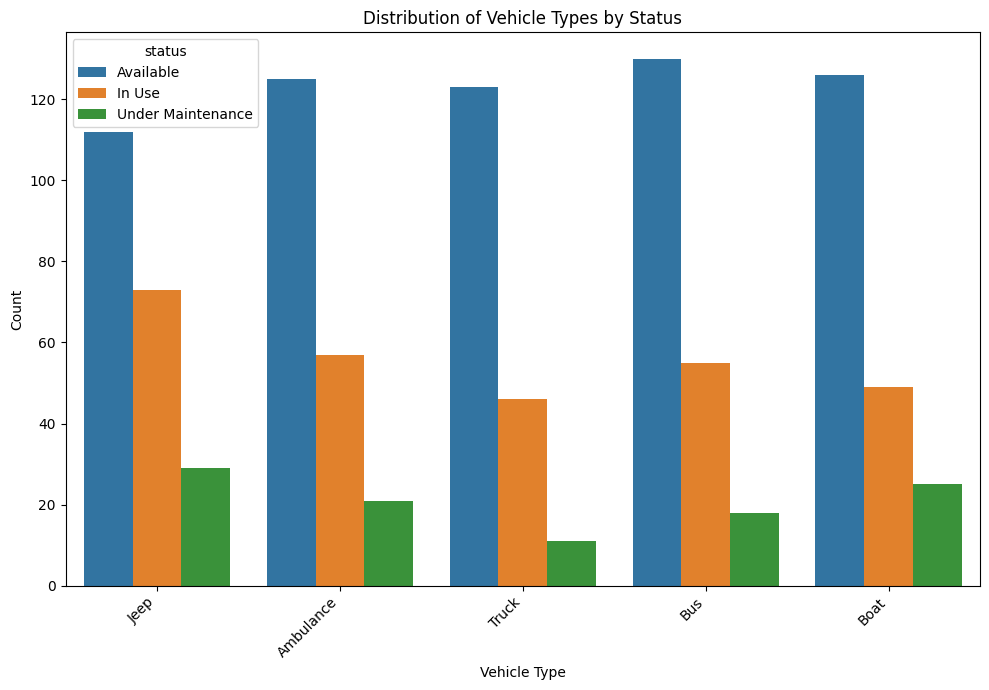


Cross-tabulation of Vehicle Type and Status:



status     Available  In Use  Under Maintenance
type                                           
Ambulance        125      57                 21
Boat             126      49                 25
Bus              130      55                 18
Jeep             112      73                 29
Truck            123      46                 11

In [18]:
# Bivariate Analysis: Vehicle Type vs. Status

plt.figure(figsize=(10, 7))
sns.countplot(data=vehicles, x='type', hue='status')
plt.title('Distribution of Vehicle Types by Status')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# You can also look at this relationship using a cross-tabulation
print("\nCross-tabulation of Vehicle Type and Status:\n")
display(pd.crosstab(vehicles['type'], vehicles['status']))

In [20]:
# Convert hazard_zones DataFrame to GeoDataFrame
hazard_zones_gdf = gpd.GeoDataFrame(
    hazard_zones, geometry=gpd.points_from_xy(hazard_zones.longitude, hazard_zones.latitude), crs="EPSG:4326"
)

print("Hazard Zones GeoDataFrame Preview:\n", hazard_zones_gdf.head(), "\n")
print("Hazard Zones GeoDataFrame Info:")
print(hazard_zones_gdf.info(), "\n")

Hazard Zones GeoDataFrame Preview:
   zone_id   latitude  longitude risk_level hazard_type  \
0     HZ1  18.902272  72.932882        Low        Fire   
1     HZ2  19.157032  73.006295       High       Flood   
2     HZ3  19.046991  72.751171     Medium        Fire   
3     HZ4  19.177318  72.913559     Medium     Cyclone   
4     HZ5  18.851458  72.853951     Medium        Fire   

                    geometry  
0  POINT (72.93288 18.90227)  
1   POINT (73.0063 19.15703)  
2  POINT (72.75117 19.04699)  
3  POINT (72.91356 19.17732)  
4  POINT (72.85395 18.85146)   

Hazard Zones GeoDataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   zone_id      300 non-null    object  
 1   latitude     300 non-null    float64 
 2   longitude    300 non-null    float64 
 3   risk_level   300 non-null    object  
 4   hazard_type  300 non

In [57]:
import geopandas as gpd
from shapely.geometry import Point

# --- Convert Shelters and Vehicles into GeoDataFrames ---
shelters_gdf = gpd.GeoDataFrame(
    shelters, geometry=gpd.points_from_xy(shelters.longitude, shelters.latitude), crs="EPSG:4326"
)

vehicles_gdf = gpd.GeoDataFrame(
    vehicles, geometry=gpd.points_from_xy(vehicles.longitude, vehicles.latitude), crs="EPSG:4326"
)

# --- Filter only High-risk hazard zones ---
high_risk_zones = hazard_zones_gdf[hazard_zones_gdf['risk_level'] == 'High']

# --- Spatial join: find shelters within High-risk hazard zones ---
shelters_in_high_risk = gpd.sjoin(shelters_gdf, high_risk_zones, how="inner", predicate="within")

# --- Spatial join: find vehicles within High-risk hazard zones ---
vehicles_in_high_risk = gpd.sjoin(vehicles_gdf, high_risk_zones, how="inner", predicate="within")

print("🚨 Shelters in High-risk zones:", len(shelters_in_high_risk))
print(shelters_in_high_risk[['shelter_id', 'capacity', 'district', 'hazard_type']].head(), "\n")

print("🚨 Vehicles in High-risk zones:", len(vehicles_in_high_risk))
print(vehicles_in_high_risk[['vehicle_id', 'type', 'status', 'hazard_type']].head(), "\n")


🚨 Shelters in High-risk zones: 0
Empty DataFrame
Columns: [shelter_id, capacity, district, hazard_type]
Index: [] 

🚨 Vehicles in High-risk zones: 0
Empty DataFrame
Columns: [vehicle_id, type, status, hazard_type]
Index: [] 



In [58]:
# Create a base map centered on Mumbai
m = folium.Map(location=[19.0760, 72.8777], zoom_start=11)

# --- Plot Shelters ---
for idx, row in shelters.iterrows():
    if row['shelter_id'] in shelters_in_high_risk['shelter_id'].values:
        # High-risk shelter
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"🚨 HIGH-RISK Shelter<br>ID: {row['shelter_id']}<br>Capacity: {row['capacity']}",
            icon=folium.Icon(color='red', icon='home')
        ).add_to(m)
    else:
        # Safe shelter
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Shelter ID: {row['shelter_id']}<br>Capacity: {row['capacity']}",
            icon=folium.Icon(color='blue', icon='home')
        ).add_to(m)

# --- Plot Vehicles ---
for idx, row in vehicles.iterrows():
    if row['vehicle_id'] in vehicles_in_high_risk['vehicle_id'].values:
        # High-risk vehicle
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"🚨 HIGH-RISK Vehicle<br>ID: {row['vehicle_id']}<br>Type: {row['type']}<br>Status: {row['status']}",
            icon=folium.Icon(color='darkred', icon='car')
        ).add_to(m)
    else:
        # Safe vehicle
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Vehicle ID: {row['vehicle_id']}<br>Type: {row['type']}<br>Status: {row['status']}",
            icon=folium.Icon(color='green', icon='car')
        ).add_to(m)

# --- Plot Hazard Zones ---
color_map = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
for idx, row in hazard_zones.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Hazard Zone ID: {row['zone_id']}<br>Risk Level: {row['risk_level']}<br>Type: {row['hazard_type']}",
        icon=folium.Icon(color=color_map.get(row['risk_level'], 'gray'), icon='warning')
    ).add_to(m)

# Show map
m
